<a href="https://colab.research.google.com/github/Redcof/MLPractice/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [9]:
def scale_dataframe(val):
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(val)
  return x_scaled
  pass

In [10]:
tf.compat.v1.disable_eager_execution()

In [11]:
# download housing data
housing = fetch_california_housing()

In [12]:
m, n = housing.data.shape
print("records = ", m, "parameters = ", n)
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]
scalled_housing_data_plus_bias = scale_dataframe(housing_data_plus_bias)

records =  20640 parameters =  8


In [13]:
# see your data
pb_housing = pd.DataFrame(housing.data, 
                          columns=housing.feature_names)
pb_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
pb_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [15]:
pb_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


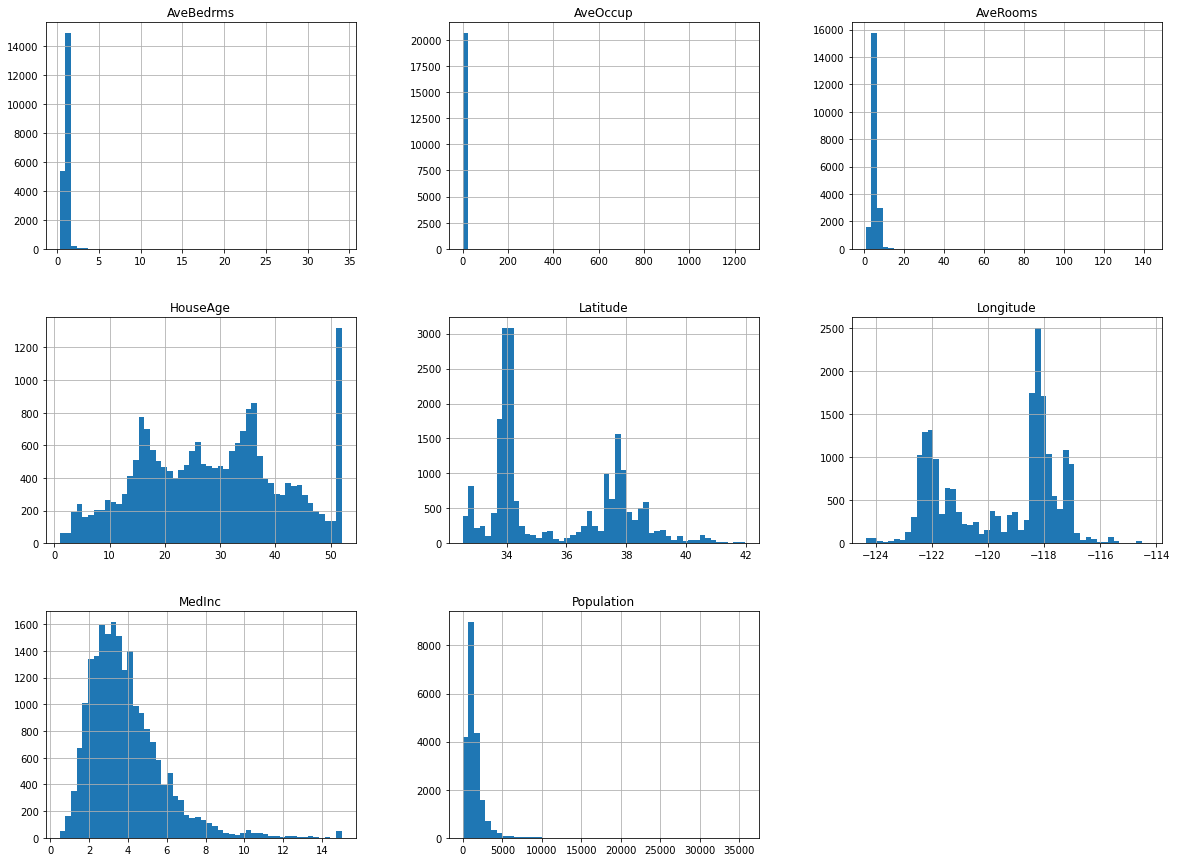

In [16]:
pb_housing.hist(bins=50, figsize=(20, 15))
plt.show()

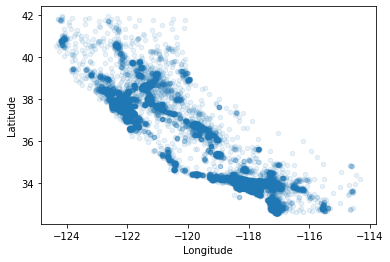

In [17]:
pb_housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)

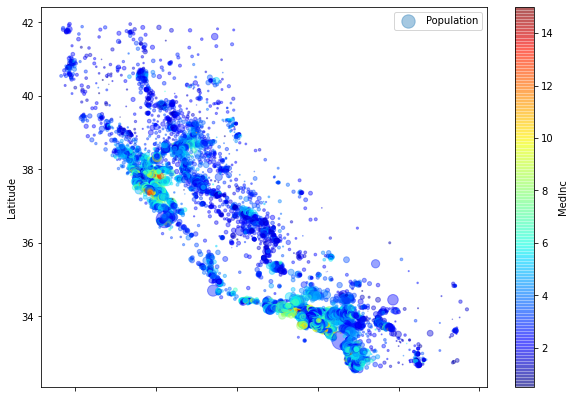

In [18]:
pb_housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
                s=pb_housing['Population']/100, label="Population", figsize=(10,7),
                c="MedInc", cmap=plt.get_cmap("jet"), colorbar=True
                )
plt.legend()

In [19]:
n_epochs = 1000
learning_rate = 0.001

In [20]:
X = tf.constant(scalled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
print(X.shape, y.shape)

(20640, 9) (20640, 1)


In [21]:
theta = tf.Variable(tf.random.uniform((n + 1, 1), -1.0, 1.0), name="theta")
print(theta.shape)

(9, 1)


In [22]:
# y = X * theta
y_pred = tf.matmul(X, theta, name="prediction")
print(y_pred.shape)

(20640, 1)


In [23]:
# calculate error
error = y_pred - y
print(error.shape)
# Mean Squared Error
mse = tf.reduce_mean(tf.square(error), name="J")

(20640, 1)


In [24]:
# gradient = 2 / m * tf.matmul(tf.transpose(X), error)
gradient = tf.gradients(mse, [theta])[0]
# print(gradient.shape)

In [25]:
training_op = theta.assign_sub(learning_rate * gradient)

In [26]:
init = tf.compat.v1.global_variables_initializer()

In [27]:
sess = tf.compat.v1.Session()
with sess.as_default():
  sess.run(init)
  for epoch in range(n_epochs):
    print("Epoch", epoch, "J=", mse.eval())
    # gradient decent
    sess.run(training_op)
  best = theta.eval()
  print(best)

Epoch 0 J= 6.3494544
Epoch 1 J= 6.335195
Epoch 2 J= 6.320976
Epoch 3 J= 6.306797
Epoch 4 J= 6.2926574
Epoch 5 J= 6.2785583
Epoch 6 J= 6.2644987
Epoch 7 J= 6.250479
Epoch 8 J= 6.2364984
Epoch 9 J= 6.222558
Epoch 10 J= 6.208657
Epoch 11 J= 6.1947947
Epoch 12 J= 6.1809716
Epoch 13 J= 6.1671877
Epoch 14 J= 6.1534424
Epoch 15 J= 6.139736
Epoch 16 J= 6.126069
Epoch 17 J= 6.1124396
Epoch 18 J= 6.0988493
Epoch 19 J= 6.085297
Epoch 20 J= 6.0717835
Epoch 21 J= 6.058307
Epoch 22 J= 6.0448694
Epoch 23 J= 6.03147
Epoch 24 J= 6.018108
Epoch 25 J= 6.0047836
Epoch 26 J= 5.9914966
Epoch 27 J= 5.978247
Epoch 28 J= 5.9650354
Epoch 29 J= 5.9518614
Epoch 30 J= 5.9387236
Epoch 31 J= 5.9256234
Epoch 32 J= 5.9125605
Epoch 33 J= 5.899534
Epoch 34 J= 5.8865447
Epoch 35 J= 5.8735914
Epoch 36 J= 5.860674
Epoch 37 J= 5.8477945
Epoch 38 J= 5.834951
Epoch 39 J= 5.8221436
Epoch 40 J= 5.809372
Epoch 41 J= 5.7966366
Epoch 42 J= 5.7839375
Epoch 43 J= 5.7712736
Epoch 44 J= 5.758646
Epoch 45 J= 5.7460537
Epoch 46 J= 5.733